# Analyzing borrowers’ risk of defaulting

We will prepare a report for a bank’s loan division. We’ll need to find out if a customer’s marital status and number of children has an impact on whether they will default on a loan. The bank already has some data on customers’ credit worthiness.

This report will be considered when building the **credit score** of a potential customer. The **credit score** is used to evaluate the ability of a potential borrower to repay their loan.

## Objectives:

We are analyzing a dataset of loanees across several parameters such as income, children, marital status, purpose of loan and education level. Using this analysis, we will attempt to create a report that will aid in the building of a credit score of a potential customer. We will avoid profiling users by gender as the four parameters we need to look for are:
1. Number of children
2. Marital Status
3. Total Income
4. Purpose of Loan

## Open the data file and have a look at the general information. 

In [61]:
# Loading all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Load the data
credit = pd.read_csv('/datasets/credit_scoring_eng.csv')

## Task 1. Data exploration

**Description of the data**
- `children` - the number of children in the family
- `days_employed` - work experience in days
- `dob_years` - client's age in years
- `education` - client's education
- `education_id` - education identifier
- `family_status` - marital status
- `family_status_id` - marital status identifier
- `gender` - gender of the client
- `income_type` - type of employment
- `debt` - was there any debt on loan repayment
- `total_income` - monthly income
- `purpose` - the purpose of obtaining a loan

In [62]:
# Let's see how many rows and columns our dataset has
credit.shape

(21525, 12)

In [63]:
#Take a closer look at the data
credit.head(15)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
5,0,-926.185831,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house
6,0,-2879.202052,43,bachelor's degree,0,married,0,F,business,0,38484.156,housing transactions
7,0,-152.779569,50,SECONDARY EDUCATION,1,married,0,M,employee,0,21731.829,education
8,2,-6929.865299,35,BACHELOR'S DEGREE,0,civil partnership,1,F,employee,0,15337.093,having a wedding
9,0,-2188.756445,41,secondary education,1,married,0,M,employee,0,23108.150,purchase of the house for my family


### Initial Observations
1. `days_employed` has a large number of negative values and at least 1 value exceeding 900 years!
2. `education` column has irregular case 
3. `education_id` and 'family_status_id' columns needs further invsetigation to understand the categorization rule followed.

In [64]:
# Get info on data and missing values
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


### Missing Values:
The columns with missing values are `days_employed` and `total_income`. This is expected as a quick look at the data shows that it includes retirees for whom, these values may not exist. But further investigation is required to ascertain the truth of this statement.

In [65]:
# Let's look at the filtered table with missing values in the the first column with missing data
credit[credit['days_employed'].isna()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding
26,0,NaN,41,secondary education,1,married,0,M,civil servant,0,NaN,education
29,0,NaN,63,secondary education,1,unmarried,4,F,retiree,0,NaN,building a real estate
41,0,NaN,50,secondary education,1,married,0,F,civil servant,0,NaN,second-hand car purchase
55,0,NaN,54,secondary education,1,civil partnership,1,F,retiree,1,NaN,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,NaN,47,Secondary Education,1,married,0,M,business,0,NaN,purchase of a car
21495,1,NaN,50,secondary education,1,civil partnership,1,F,employee,0,NaN,wedding ceremony
21497,0,NaN,48,BACHELOR'S DEGREE,0,married,0,F,business,0,NaN,building a property
21502,1,NaN,42,secondary education,1,married,0,F,employee,0,NaN,building a real estate


### Investigating the Missing Values
The missing values appear to be symmetric across `days_employed` and `total_income`. This points to the possibility of lack of employment data for those entries. In somce cases, the missing values are justified in cases where `income_type` is listed as 'retiree'.

In [66]:
# Let's apply multiple conditions for filtering data and look at the number of rows in the filtered table.
print('Missing days_employed:',credit[credit['days_employed'].isna()].shape[0])
print('Missing total_income:',credit[credit['total_income'].isna()].shape[0])
print('Missing Both:',credit[(credit['days_employed'].isna())&(credit['total_income'].isna())].shape[0])

Missing days_employed: 2174
Missing total_income: 2174
Missing Both: 2174


In [67]:
print('Percentage of Missing Values: ',
      credit['days_employed'].isna().sum() * 100 / credit.shape[0],'%', sep = '' )

Percentage of Missing Values: 10.099883855981417%


### Intermediate Conclusions
The number of rows in the filtered tables match the number of missing values in both columns `date_employed` and `total_income`. The characteristic that may be influencing the occurance of missing values is likely to be: `income_type`.

In our next steps, we will attempt to find a concrete correlation between `income_type` and missing values. 

In [68]:
# Let's investigate clients who do not have data on identified characteristic and the column with the missing values

missing_values = credit[credit['total_income'].isna()]

In [69]:
# Checking distribution of missing values
missing_values['income_type'].value_counts() / missing_values.shape[0]

employee         0.508280
business         0.233671
retiree          0.189972
civil servant    0.067617
entrepreneur     0.000460
Name: income_type, dtype: float64



**Possible reasons for missing values in data**

As hypothesised earlier, the missing values may arise from entries where the `income_type` is 'retiree'. But other missing values such as 'employee' are likely a result of missing or corrupted data. It also makes sense for 'business' and 'entrepreneur' to have missing values as such values may not be easy to calculate. The values may be confidential for 'civil servant' entries. Further exploration is needed. 

In [70]:
# Checking the distribution in the whole dataset
credit['income_type'].value_counts() / credit.shape[0]

employee                       0.516562
business                       0.236237
retiree                        0.179141
civil servant                  0.067782
unemployed                     0.000093
entrepreneur                   0.000093
paternity / maternity leave    0.000046
student                        0.000046
Name: income_type, dtype: float64

In [71]:
# Check for other reasons and patterns that could lead to missing values
missing_values['education_id'].value_counts() / missing_values.shape[0]

1    0.708372
0    0.250230
2    0.031739
3    0.009660
Name: education_id, dtype: float64

In [72]:
credit['education_id'].value_counts() / credit.shape[0]

1    0.707689
0    0.244367
2    0.034564
3    0.013101
4    0.000279
Name: education_id, dtype: float64

Checking for patterns in correlation with: `debt`, `education` and `education_id`

In [73]:
print(missing_values['debt'].value_counts() / missing_values.shape[0])
credit['debt'].value_counts() / credit.shape[0]

0    0.921803
1    0.078197
Name: debt, dtype: float64


0    0.919117
1    0.080883
Name: debt, dtype: float64

In [74]:
print(missing_values['family_status'].value_counts() / missing_values.shape[0])
credit['family_status'].value_counts() / credit.shape[0]

married              0.568997
civil partnership    0.203312
unmarried            0.132475
divorced             0.051518
widow / widower      0.043698
Name: family_status, dtype: float64


married              0.575145
civil partnership    0.194053
unmarried            0.130685
divorced             0.055517
widow / widower      0.044599
Name: family_status, dtype: float64

**Conclusions**

There do not seem to be any discernible patterns to the missing values. We will retain them as they are for now.

**Next Steps**
Addressing the missing/unexpected values:
1. `days_employed` - These values are difficult to address. Few assumptions can be made about the characteristic using the given data. As the objective of the study may not require processing of this data, we may be able to safely exclude this column from our analysis.
2. `total_income` - This could be a crucial factor in our analysis. With over 10% missing values, it will make sense to use categorized aggregations to fill missing values after further exploration
3. `education` - This column has implicit duplicates that need to be accounted for by fixing case mismatches and other potential entry issues

## Data transformation

Let's fix issues with column data

In [75]:
# Let's see all values in education column to check if and what spellings will need to be fixed
credit['education'].unique()

array(["bachelor's degree", 'secondary education', 'Secondary Education',
       'SECONDARY EDUCATION', "BACHELOR'S DEGREE", 'some college',
       'primary education', "Bachelor's Degree", 'SOME COLLEGE',
       'Some College', 'PRIMARY EDUCATION', 'Primary Education',
       'Graduate Degree', 'GRADUATE DEGREE', 'graduate degree'],
      dtype=object)

Clearly, changes to the case are needed to ensure we eliminate duplicates.

In [76]:
# Fix the registers if required
credit['education'] = credit['education'].str.lower()

In [77]:
# Checking all the values in the column to make sure we fixed them
credit['education'].unique()

array(["bachelor's degree", 'secondary education', 'some college',
       'primary education', 'graduate degree'], dtype=object)

Great Success! The education column is fixed! Onward!

In [78]:
# Let's see the distribution of values in the `children` column
credit['children'].value_counts()

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

In [79]:
credit[(credit['children'] == -1) | (credit['children'] == 20)].shape[0] * 100 / credit.shape[0]

0.5714285714285714

The missing data is just a very small percentage. We can safely drop it.

In [80]:
# [fix the data based on your decision]
credit = credit[credit['children']!= 20]
credit = credit[credit['children']!= -1]

In [81]:
# Checking the `children` column again to make sure it's all fixed
credit['children'].unique()

array([1, 0, 3, 2, 4, 5])

In [82]:
# Find problematic data in `days_employed`, if they exist, and calculate the percentage
credit['days_employed'].value_counts()

-986.927316       1
-849.764227       1
-5135.928528      1
-1453.358707      1
-4977.646061      1
                 ..
-2348.524271      1
-2338.480708      1
 356642.853685    1
-1218.820922      1
-582.538413       1
Name: days_employed, Length: 19240, dtype: int64

In [83]:
credit[credit['days_employed'] < 0]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
5,0,-926.185831,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house
...,...,...,...,...,...,...,...,...,...,...,...,...
21519,1,-2351.431934,37,graduate degree,4,divorced,3,M,employee,0,18551.846,buy commercial real estate
21520,1,-4529.316663,43,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions
21522,1,-2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property
21523,3,-3112.481705,38,secondary education,1,married,0,M,employee,1,39054.888,buying my own car


In [84]:
credit[credit['days_employed'] > 18400]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
18,0,400281.136913,53,secondary education,1,widow / widower,2,F,retiree,0,9091.804,buying a second-hand car
24,1,338551.952911,57,secondary education,1,unmarried,4,F,retiree,0,46487.558,transactions with commercial real estate
25,0,363548.489348,67,secondary education,1,married,0,M,retiree,0,8818.041,buy real estate
30,1,335581.668515,62,secondary education,1,married,0,F,retiree,0,27432.971,transactions with commercial real estate
...,...,...,...,...,...,...,...,...,...,...,...,...
21505,0,338904.866406,53,secondary education,1,civil partnership,1,M,retiree,0,12070.399,to have a wedding
21508,0,386497.714078,62,secondary education,1,married,0,M,retiree,0,11622.175,property
21509,0,362161.054124,59,bachelor's degree,0,married,0,M,retiree,0,11684.650,real estate transactions
21518,0,373995.710838,59,secondary education,1,married,0,F,retiree,0,24618.344,purchase of a car


A large number of values appear to be negative. This seems to be a technical glitch where the '-' symbol has been appended to most values in this column. Some values are also exceptionally high i.e. > 300,000 days. Let's dig further and fix the problem in 2 steps:
1. If `days_employed` < 0, multiply the column value by -1 to correct the error.
2. Replace all other values which are higher than 18,400 days by NaN values. 

As this column does not feature in further analysis, we do not need to maintain accuracy for such values.

In [85]:
# Address the problematic values
def days_clean(day):
    if day < 0:
        return day * -1
    return np.nan

In [86]:
credit['days_employed'] = credit['days_employed'].apply(days_clean)

In [87]:
# Check the result
credit['days_employed'].value_counts()

986.927316     1
326.080505     1
666.954650     1
449.197916     1
1335.688447    1
              ..
263.131415     1
1218.820922    1
2338.480708    1
2348.524271    1
582.538413     1
Name: days_employed, Length: 15809, dtype: int64

In [88]:
#Let's check the dob_years column
credit['dob_years'].value_counts() * 100 / credit.shape[0]

35    2.868891
40    2.817494
41    2.817494
34    2.789459
38    2.780114
42    2.766097
33    2.696010
39    2.672647
31    2.597888
36    2.583871
29    2.537146
44    2.537146
30    2.504439
48    2.504439
37    2.481077
43    2.382955
50    2.378282
32    2.364265
49    2.359593
28    2.340903
45    2.308195
27    2.289506
52    2.256798
56    2.252126
47    2.242781
54    2.224091
46    2.191384
58    2.154004
57    2.135314
53    2.135314
51    2.083917
55    2.060555
59    2.060555
26    1.897019
60    1.756845
25    1.663396
61    1.649379
62    1.640034
63    1.252219
64    1.228857
24    1.228857
23    1.177460
65    0.906457
66    0.855060
22    0.855060
67    0.780301
21    0.513971
0     0.467246
68    0.462574
69    0.387814
70    0.303710
71    0.271003
20    0.238295
72    0.154191
19    0.065414
73    0.037380
74    0.028035
75    0.004672
Name: dob_years, dtype: float64

In [89]:
credit[credit['dob_years']  == 0]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
99,0,NaN,0,secondary education,1,married,0,F,retiree,0,11406.644,car
149,0,2664.273168,0,secondary education,1,divorced,3,F,employee,0,11228.230,housing transactions
270,3,1872.663186,0,secondary education,1,married,0,F,employee,0,16346.633,housing renovation
578,0,NaN,0,secondary education,1,married,0,F,retiree,0,15619.310,construction of own property
1040,0,1158.029561,0,bachelor's degree,0,divorced,3,F,business,0,48639.062,to own a car
...,...,...,...,...,...,...,...,...,...,...,...,...
19829,0,NaN,0,secondary education,1,married,0,F,employee,0,NaN,housing
20462,0,NaN,0,secondary education,1,married,0,F,retiree,0,41471.027,purchase of my own house
20577,0,NaN,0,secondary education,1,unmarried,4,F,retiree,0,20766.202,property
21179,2,108.967042,0,bachelor's degree,0,married,0,M,business,0,38512.321,building a real estate


Approximately 0.4% of the values in the `dob_years` column are 0. These are obviously incorrect. A closer look does not reveal any obvious patterns. As we lack the knowledge to correlate age with other characteristics, we will simply drop these columns.

In [90]:
# Address the issues in the `dob_years` column, if they exist
credit = credit[credit['dob_years'] != 0]

In [91]:
# Check the result - make sure it's fixed
credit['dob_years'].value_counts()

35    614
40    603
41    603
34    597
38    595
42    592
33    577
39    572
31    556
36    553
29    543
44    543
30    536
48    536
37    531
43    510
50    509
32    506
49    505
28    501
45    494
27    490
52    483
56    482
47    480
54    476
46    469
58    461
53    457
57    457
51    446
55    441
59    441
26    406
60    376
25    356
61    353
62    351
63    268
64    263
24    263
23    252
65    194
66    183
22    183
67    167
21    110
68     99
69     83
70     65
71     58
20     51
72     33
19     14
73      8
74      6
75      1
Name: dob_years, dtype: int64

Looks good!

In [92]:
# Let's see the values for the family_status column
credit['family_status'].value_counts()


married              12254
civil partnership     4139
unmarried             2783
divorced              1179
widow / widower        947
Name: family_status, dtype: int64

No obvious issues with this column

In [93]:
# Let's see the values in the gender column
credit['gender'].value_counts()

F      14083
M       7218
XNA        1
Name: gender, dtype: int64

Just one erroneous value exists: XNA

In [94]:
# Address the problematic values
credit = credit[credit['gender']!= 'XNA']

In [95]:
# Check the result
credit['gender'].value_counts(dropna = False)

F    14083
M     7218
Name: gender, dtype: int64

Look how clean!

In [96]:
# Let's see the values in the income_type column
credit['income_type'].value_counts(dropna = False)

employee                       10996
business                        5033
retiree                         3819
civil servant                   1447
unemployed                         2
entrepreneur                       2
paternity / maternity leave        1
student                            1
Name: income_type, dtype: int64

No obvious issues. No missing values either. Excellent!

In [97]:
# Checking duplicates
credit[credit.duplicated()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
2849,0,NaN,41,secondary education,1,married,0,F,employee,0,NaN,purchase of the house for my family
3290,0,NaN,58,secondary education,1,civil partnership,1,F,retiree,0,NaN,to have a wedding
4182,1,NaN,34,bachelor's degree,0,civil partnership,1,F,employee,0,NaN,wedding ceremony
4851,0,NaN,60,secondary education,1,civil partnership,1,F,retiree,0,NaN,wedding ceremony
5557,0,NaN,58,secondary education,1,civil partnership,1,F,retiree,0,NaN,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
20702,0,NaN,64,secondary education,1,married,0,F,retiree,0,NaN,supplementary education
21032,0,NaN,60,secondary education,1,married,0,F,retiree,0,NaN,to become educated
21132,0,NaN,47,secondary education,1,married,0,F,employee,0,NaN,housing renovation
21281,1,NaN,30,bachelor's degree,0,married,0,F,employee,0,NaN,buy commercial real estate


We see 71 duplicated values here. Let's drop them

In [98]:
# Address the duplicates, if they exist
credit.drop_duplicates(inplace = True)

In [99]:
# Last check whether we have any duplicates
credit.duplicated().sum()

0

In [100]:
credit['purpose'].unique()

array(['purchase of the house', 'car purchase', 'supplementary education',
       'to have a wedding', 'housing transactions', 'education',
       'having a wedding', 'purchase of the house for my family',
       'buy real estate', 'buy commercial real estate',
       'buy residential real estate', 'construction of own property',
       'property', 'building a property', 'buying a second-hand car',
       'buying my own car', 'transactions with commercial real estate',
       'building a real estate', 'housing',
       'transactions with my real estate', 'cars', 'to become educated',
       'second-hand car purchase', 'getting an education', 'car',
       'wedding ceremony', 'to get a supplementary education',
       'purchase of my own house', 'real estate transactions',
       'getting higher education', 'to own a car', 'purchase of a car',
       'profile education', 'university education',
       'buying property for renting out', 'to buy a car',
       'housing renovation', 'going

In [101]:
def purpose_unique(purpose):
    
    #lists of similar purposes in order to simplify the purpose column
    
    real_estate =  ['transactions with my real estate','purchase of the house',
                   'purchase of the house for my family','housing','purchase of my own house',
                   'buy residential real estate','construction of own property','housing transactions',
                    'buy real estate','buy commercial real estate','property','building a property',
                   'transactions with commercial real estate','building a real estate','housing',
                    'real estate transactions','buying property for renting out','housing renovation',
                   'transactions with my real estate']
    
    car = ['car purchase','buying a second-hand car','buying my own car','cars','second-hand car purchase','car',
          'to own a car','purchase of a car','to buy a car']
    
    education = ['supplementary education','to become educated','getting an education',
                 'to get a supplementary education','getting higher education','profile education',
                 'university education','going to university','education']
    
    wedding = ['to have a wedding','having a wedding','wedding ceremony']
    
    if purpose in real_estate:
        return 'real_estate'
    elif purpose in car:
        return 'car'
    elif purpose in education:
        return 'education'
    elif purpose in wedding:
        return 'wedding'

In [102]:
real_estate =  ['transactions with my real estate','purchase of the house',
                   'purchase of the house for my family','housing','purchase of my own house',
                   'buy residential real estate','construction of own property','housing transactions',
                    'buy real estate','buy commercial real estate','property','building a property',
                   'transactions with commercial real estate','building a real estate','housing',
                    'real estate transactions','buying property for renting out','housing renovation',
                   'transactions with my real estate']
    
car = ['car purchase','buying a second-hand car','buying my own car','cars','second-hand car purchase','car',
          'to own a car','purchase of a car','to buy a car']
    
education = ['supplementary education','to become educated','getting an education',
                 'to get a supplementary education','getting higher education','profile education',
                 'university education','going to university','education']
    
wedding = ['to have a wedding','having a wedding','wedding ceremony']

It will be wise to check sum with the original list of unique purposes to ensure we did not miss any purposes.

In [103]:
checksum = set(credit['purpose'].unique()) - set(real_estate + car + education + wedding)
checksum

set()

We didn't miss anything!

In [104]:
credit['purpose'] = credit['purpose'].apply(purpose_unique)

In [105]:
credit['purpose'].value_counts()

real_estate    10703
car             4258
education       3970
wedding         2299
Name: purpose, dtype: int64

In [106]:
# Check the size of the dataset after the first manipulations.

In [107]:
retained = credit.shape[0] * 100 / 21525 # original size of dataset
print(f'Data retained after cleaning: {retained:.2f}%') 

Data retained after cleaning: 98.63%


### Post Clean Up

After completing the inital processing, we have managed to retain **98.63%** of data from the original dataset. We have:
1. Investigated missing values and patterns
2. Cleaned columns with implicit duplicates caused by case mismatch
3. Eliminated erroroneous values and outliers from columns
4. Removed Duplicates

# Working with missing values

### Restoring missing values in `total_income`

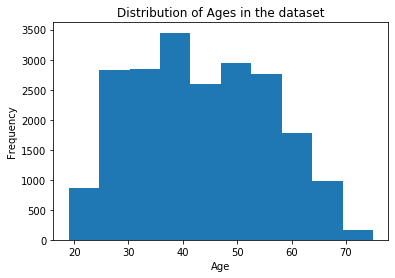

In [108]:
plt.hist(credit['dob_years'])
plt.title('Distribution of Ages in the dataset')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [109]:
# Let's write a function that calculates the age category
def age_categorize(age):
    if age < 0: 
        return 'Invalid'
    elif age < 10:
        return '0-9'
    elif age < 20:
        return '10-19'
    elif age < 30:
        return '20-29'
    elif age < 40:
        return '30-39'
    elif age < 50:
        return '40-49'
    elif age < 60:
        return '50-59'
    return '60+'

In [110]:
# Test if the function works
print(age_categorize(55))
print(age_categorize(65))
print(age_categorize(-3))

50-59
60+
Invalid


In [111]:
# Creating new column based on function
credit['age_category'] = credit['dob_years'].apply(age_categorize)

In [112]:
# Checking how values in the new column
credit['age_category'].value_counts()

30-39    5625
40-49    5318
50-59    4631
20-29    3151
60+      2491
10-19      14
Name: age_category, dtype: int64

In [113]:
credit.corr()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
children,1.000000,-0.062863,-0.320503,-0.027096,-0.158995,0.024949,0.031648
days_employed,-0.062863,1.000000,0.326309,-0.015758,-0.076423,-0.069985,0.027594
dob_years,-0.320503,0.326309,1.000000,0.064792,-0.068788,-0.071853,-0.056291
education_id,-0.027096,-0.015758,0.064792,1.000000,0.009245,0.052561,-0.179611
family_status_id,-0.158995,-0.076423,-0.068788,0.009245,1.000000,0.020531,-0.007908
debt,0.024949,-0.069985,-0.071853,0.052561,0.020531,1.000000,-0.012468
total_income,0.031648,0.027594,-0.056291,-0.179611,-0.007908,-0.012468,1.000000


What are the factors that affect `total_income`?
1. `education_id` has a mild negative correlation to total_income
2. We also know that `income_type` will affect total_income
3. Age Category is likely to affect `income_type`

In [114]:
# Create a table without missing values and print a few of its rows to make sure it looks fine
credit_complete = credit[~credit['income_type'].isna()]
credit_complete.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_category
0,1,8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,real_estate,40-49
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car,30-39
2,0,5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,real_estate,30-39
3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,education,30-39
4,0,NaN,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,wedding,50-59


In [115]:
# Look at the mean values for income based on identified factors
credit_complete.groupby(['income_type','age_category'])['total_income'].mean()

income_type                  age_category
business                     10-19           19197.349000
                             20-29           28805.757641
                             30-39           33160.803928
                             40-49           34009.673215
                             50-59           32442.579518
                             60+             32185.858797
civil servant                10-19           12125.986000
                             20-29           25116.014384
                             30-39           27889.093679
                             40-49           28549.046736
                             50-59           25854.598489
                             60+             29465.423241
employee                     10-19           14882.764600
                             20-29           24129.400541
                             30-39           26190.554816
                             40-49           26209.902974
                             5

In [116]:
credit_complete.groupby(['income_type','education','age_category'])['total_income'].mean()

income_type  education            age_category
business     bachelor's degree    20-29           32256.239769
                                  30-39           39220.047065
                                  40-49           41289.203678
                                  50-59           42869.702488
                                  60+             39806.817377
                                                      ...     
retiree      some college         50-59           19487.096600
                                  60+             25987.356353
student      bachelor's degree    20-29           15712.260000
unemployed   bachelor's degree    40-49           32435.602000
             secondary education  30-39            9593.119000
Name: total_income, Length: 90, dtype: float64

In [117]:
# Look at the median values for income based on identified factors
medians = credit_complete.groupby(['income_type','education','age_category'])['total_income'].median()
medians.head()

income_type  education          age_category
business     bachelor's degree  20-29           28250.2840
                                30-39           32639.6155
                                40-49           34592.0450
                                50-59           35415.7710
                                60+             30985.7500
Name: total_income, dtype: float64

In [118]:
#test it
medians['business','bachelor\'s degree','30-39']

32639.6155

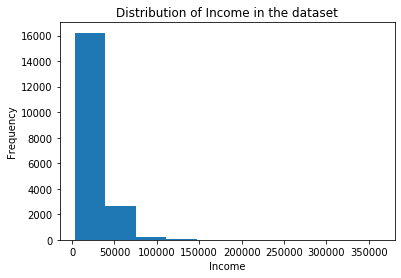

In [119]:
#quick look at income distribution
plt.hist(credit_complete['total_income'])
plt.title('Distribution of Income in the dataset')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

In [120]:
#how many null values do we have?
credit['total_income'].isna().sum()

2081

Some outliers exist for the `total_income` column. We can use either the median or the mean to fill missing values.

[Make a decision on what characteristics define income most and whether you will use a median or a mean. Explain why you made this decision]


We will utilize the median to fill the missing values in order to avoid potential bias from outliers.

In [121]:
# Function that we will use for filling in missing values
def fill_income(row):
        income_type = row['income_type']
        education = row['education']
        age_category = row['age_category']
        row['total_income'] = medians[income_type,education,age_category]
        return row

In [122]:
row_data = ['business','bachelor\'s degree', '30-39',np.nan]
row_cols = ['income_type','education','age_category','total_income']
row = pd.Series(data=row_data, index=row_cols)
row

income_type              business
education       bachelor's degree
age_category                30-39
total_income                  NaN
dtype: object

In [123]:
print(fill_income(row))

income_type              business
education       bachelor's degree
age_category                30-39
total_income              32639.6
dtype: object


In [124]:
# Apply it to every row
credit[credit['total_income'].isna()] = credit[credit['total_income'].isna()].apply(fill_income,axis = 1)

In [125]:
# Check if we got any errors
credit['total_income'].isna().sum()

2

In [126]:
# Replacing missing values
credit[credit['total_income'].isna()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_category
5936,0,NaN,58,bachelor's degree,0,married,0,M,entrepreneur,0,NaN,real_estate,50-59
8142,0,NaN,64,primary education,3,civil partnership,1,F,civil servant,0,NaN,wedding,60+


In [127]:
medians['entrepreneur',"bachelor's degree",'50-59']

nan

In [128]:
medians['civil servant','primary education','60+']

nan

We need to drop these columns since there is no aggregated data to replace the null values.

In [129]:
credit = credit[~credit['total_income'].isna()]

In [130]:
# Checking the number of entries in the columns
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21228 entries, 0 to 21524
Data columns (total 13 columns):
children            21228 non-null int64
days_employed       15735 non-null float64
dob_years           21228 non-null int64
education           21228 non-null object
education_id        21228 non-null int64
family_status       21228 non-null object
family_status_id    21228 non-null int64
gender              21228 non-null object
income_type         21228 non-null object
debt                21228 non-null int64
total_income        21228 non-null float64
purpose             21228 non-null object
age_category        21228 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 2.3+ MB


###  Restoring values in `days_employed`

Let's utilise the age category parameter to understand the distribution of `days_employed`

In [131]:
# Distribution of `days_employed` medians based on your identified parameters
days_employed_medians = credit.groupby('age_category')['days_employed'].median()
days_employed_medians

age_category
10-19     724.492610
20-29     999.745149
30-39    1592.911154
40-49    2022.581349
50-59    2265.688673
60+      2663.211434
Name: days_employed, dtype: float64

In [132]:
days_employed_medians['30-39']

1592.911153875221

In [133]:
# Distribution of `days_employed` means based on your identified parameters
days_employed_means = credit.groupby('age_category')['days_employed'].mean()
days_employed_means

age_category
10-19     633.678086
20-29    1211.356257
30-39    2026.310529
40-49    2734.320219
50-59    3267.295190
60+      3845.501081
Name: days_employed, dtype: float64

As there are potential outliers, it makes sense to use medians to fill na values

In [134]:
credit['days_employed'].isna().sum()

5493

In [135]:
# Check that the function works
def fill_days_employed(row):
    age_category = row['age_category']
    row['days_employed'] = days_employed_medians[age_category]
    return row

In [136]:
#test the function
row_data = [np.nan,'30-39']
row_cols = ['days_employed','age_category']
row = pd.Series(data = row_data, index = row_cols)
row

days_employed      NaN
age_category     30-39
dtype: object

In [137]:
print(fill_days_employed(row))

days_employed    1592.91
age_category       30-39
dtype: object


In [138]:
# Apply function to the days_employed
credit[credit['days_employed'].isna()] = credit[credit['days_employed'].isna()].apply(fill_days_employed, axis = 1)

In [139]:
# Check if function worked
credit['days_employed'].isna().sum()

0

In [140]:
# Check the entries in all columns
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21228 entries, 0 to 21524
Data columns (total 13 columns):
children            21228 non-null int64
days_employed       21228 non-null float64
dob_years           21228 non-null int64
education           21228 non-null object
education_id        21228 non-null int64
family_status       21228 non-null object
family_status_id    21228 non-null int64
gender              21228 non-null object
income_type         21228 non-null object
debt                21228 non-null int64
total_income        21228 non-null float64
purpose             21228 non-null object
age_category        21228 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 2.3+ MB


No columns have any missing data now!

## Categorization of data

Let's recap the questions we need to answer:
1. Is there a connection between having kids and repaying a loan on time?
2. Is there a connection between marital status and repaying a loan on time?
3. Is there a connection between income level and repaying a loan on time?
4. How do different loan purposes affect on-time loan repayment?

In [141]:
# Print the values for selected data for categorization
print(credit[['children','family_status','total_income','purpose']])

       children      family_status  total_income      purpose
0             1            married     40620.102  real_estate
1             1            married     17932.802          car
2             0            married     23341.752  real_estate
3             3            married     42820.568    education
4             0  civil partnership     25378.572      wedding
...         ...                ...           ...          ...
21520         1  civil partnership     35966.698  real_estate
21521         0            married     24959.969          car
21522         1  civil partnership     14347.610  real_estate
21523         3            married     39054.888          car
21524         2            married     13127.587          car

[21228 rows x 4 columns]


In [142]:
# Check the unique values
columns = ['children','family_status','total_income','purpose']
for column in columns:
    print('Unique values in:',column, credit[column].unique())

Unique values in: children [1 0 3 2 4 5]
Unique values in: family_status ['married' 'civil partnership' 'widow / widower' 'divorced' 'unmarried']
Unique values in: total_income [40620.102 17932.802 23341.752 ... 14347.61  39054.888 13127.587]
Unique values in: purpose ['real_estate' 'car' 'education' 'wedding']


We can categorize the above columns on the following basis:
1. `children` can be categorised as 1 or 0 based on number of children. For 1 or more children, we will classify it as 1.
2. `family_status` can be calssified as 1 for married/civil partnership and 0 for others.
3. `total_income` will require a classification based on income levels. We will use percentiles of distribution for this.
4. `purpose` is already categorical as we worked upon this earlier

In [143]:
# Let's write a function to categorize the data based on common topics
def categorize_children(value):
    if value > 0:
        return 1
    else:
        return 0
def categorize_marital(value):
    if value == 'married':
        return 1
    return 0

In [144]:
# Create a column with the categories and count the values for them
credit['children_categories'] = credit['children'].apply(categorize_children)
print(credit['children_categories'].value_counts())
credit['family_status_categories'] = credit['family_status'].apply(categorize_marital)
print(credit['family_status_categories'].value_counts())

0    14019
1     7209
Name: children_categories, dtype: int64
1    12212
0     9016
Name: family_status_categories, dtype: int64


In [145]:
# Looking through all the numerical data in the total_income column
credit['total_income']

0        40620.102
1        17932.802
2        23341.752
3        42820.568
4        25378.572
           ...    
21520    35966.698
21521    24959.969
21522    14347.610
21523    39054.888
21524    13127.587
Name: total_income, Length: 21228, dtype: float64

In [146]:
# Getting summary statistics for the column
summary = credit['total_income'].describe()
summary

count     21228.000000
mean      26485.074188
std       15768.381327
min        3306.762000
25%       17189.188500
50%       22929.770500
75%       31653.841250
max      362496.645000
Name: total_income, dtype: float64

We will group the `total_income` column into 4 parts according the quartiles. This will negate effects of outliers

In [147]:
# Creating function for categorizing into different numerical groups based on ranges
def categorize_income(value):
    if value < summary['25%']:
        return '<25%'
    elif value < summary['50%']:
        return '<50%'
    elif value < summary['75%']:
        return '<75%'
    return '>75%'

In [148]:
#testing
print(categorize_income(3000))
print(categorize_income(50000))
print(categorize_income(22000))
print(categorize_income(300000))
print(categorize_income(0))

<25%
>75%
<50%
>75%
<25%


In [149]:
# Creating column with categories
credit['income_category'] = credit['total_income'].apply(categorize_income)

In [150]:
# Count each categories values to see the distribution
credit['income_category'].value_counts()

<75%    5307
>75%    5307
<50%    5307
<25%    5307
Name: income_category, dtype: int64

Perfectly balanced, as all things should be.

## Checking the Hypotheses


**Is there a correlation between having children and paying back on time?**

In [151]:
credit['children_categories'].value_counts() * 100 / credit.shape[0]

0    66.040136
1    33.959864
Name: children_categories, dtype: float64

In [152]:
credit['children'].value_counts() * 100 / credit.shape[0]

0    66.040136
1    22.573959
2     9.605238
3     1.545129
4     0.193141
5     0.042397
Name: children, dtype: float64

In [153]:
# Check the children data and paying back on time
print(credit[credit['debt']==1].groupby('children_categories')['debt'].value_counts() * 100 / credit[credit['debt']==1].shape[0])

# Calculating default-rate based on the number of children
credit[credit['debt']==1].groupby('children')['debt'].value_counts() * 100 / credit[credit['debt']==1].shape[0]



children_categories  debt
0                    1       61.36891
1                    1       38.63109
Name: debt, dtype: float64


children  debt
0         1       61.368910
1         1       25.580046
2         1       11.252900
3         1        1.566125
4         1        0.232019
Name: debt, dtype: float64

**Conclusion**

The study reveals a definite trend:
1. While 66% of loanees in the dataset have 0 children, only 61% of defaulters have 0 children. 
2. The proportional risk of default (i.e. number of loanees vs number of defaulters) rises with rise in number of children.

Therefore, Having 1 or more children increases the risk of default by a loanee.

**Is there a correlation between family status and paying back on time?**

In [154]:
credit['family_status_categories'].value_counts() * 100 / credit.shape[0]

1    57.527793
0    42.472207
Name: family_status_categories, dtype: float64

In [155]:
credit['family_status'].value_counts() * 100 / credit.shape[0]

married              57.527793
civil partnership    19.365932
unmarried            13.095911
divorced              5.553985
widow / widower       4.456378
Name: family_status, dtype: float64

In [156]:
# Check the family status data and paying back on time
print(credit[credit['debt']==1].groupby('family_status_categories')['debt'].value_counts() * 100 / credit[credit['debt']==1].shape[0])


# Calculating default-rate based on family status
credit[credit['debt']==1].groupby('family_status')['debt'].value_counts() * 100 / credit[credit['debt']==1].shape[0]


family_status_categories  debt
0                         1       46.461717
1                         1       53.538283
Name: debt, dtype: float64


family_status      debt
civil partnership  1       22.215777
divorced           1        4.872390
married            1       53.538283
unmarried          1       15.777262
widow / widower    1        3.596288
Name: debt, dtype: float64

**Conclusion**

1. Unmarried loanees tend to have lower repayment rates than loanees who are married.
2. A closer look indicates that civil partnerships have the highest proportional rate of default.
3. Divorced or Widow/Widower loanees tend to have proportionally lower rates of defualt.

Therefore, married loanees have a higher chance of paying their loans back on time.

**Is there a correlation between income level and paying back on time?**

In [157]:
credit['total_income'].value_counts() * 100 / credit.shape[0]

22221.9355    1.182401
22083.6365    1.149425
17893.5080    0.716035
18805.1185    0.687771
21762.1655    0.593556
                ...   
25198.1650    0.004711
26643.7540    0.004711
48796.3410    0.004711
34774.6100    0.004711
9591.8240     0.004711
Name: total_income, Length: 19181, dtype: float64

In [158]:
credit['income_category'].value_counts() * 100 / credit.shape[0]

<75%    25.0
>75%    25.0
<50%    25.0
<25%    25.0
Name: income_category, dtype: float64

In [159]:
# Check the income level data and paying back on time
print(credit[credit['debt']==1].groupby('income_category')['debt'].value_counts() * 100 / credit[credit['debt']==1].shape[0])




# Calculating default-rate based on income level
credit[credit['debt']==1].groupby('total_income')['debt'].value_counts() * 100 / credit[credit['debt']==1].shape[0]


income_category  debt
<25%             1       24.651972
<50%             1       27.784223
<75%             1       25.986079
>75%             1       21.577726
Name: debt, dtype: float64


total_income  debt
3306.762      1       0.058005
4664.644      1       0.058005
5430.683      1       0.058005
5639.846      1       0.058005
5803.271      1       0.058005
                        ...   
113898.597    1       0.058005
131588.163    1       0.058005
138685.566    1       0.058005
164943.868    1       0.058005
352136.354    1       0.058005
Name: debt, Length: 1584, dtype: float64

**Conclusion**

It is clearly pointless to dive into every single value of the `total_income` column. The categories however provide us with the insight that:
1. Proportionally higher rates of default occur in the 25%-75% range of incomes. 
2. The highest proportional rate of default is in the 25%-50% range.

Therefore, a loanee in the top 25% of income levels is more likely to pay back a loan on time.

**How does credit purpose affect the default rate?**

In [160]:
credit['purpose'].value_counts() * 100 / credit.shape[0]

real_estate    50.414547
car            20.058413
education      18.701715
wedding        10.825325
Name: purpose, dtype: float64

In [161]:
# Check the percentages for default rate for each credit purpose and analyze them

credit[credit['debt']==1].groupby('purpose')['debt'].value_counts() * 100 / credit[credit['debt']==1].shape[0]

purpose      debt
car          1       23.027842
education    1       21.403712
real_estate  1       45.069606
wedding      1       10.498840
Name: debt, dtype: float64

**Conclusion**

We observe:
1. Real Estate defaults are proportionally lower
2. Car and Education loans see proportionally higher defaults.
3. Car loans have the highest proportional default rates.

Loanees are more likely to defualt on car loans than real estate or wedding loans.

# General Conclusion 

## A note on the data
The original dataset contained **21,525** rows.

The dataset contained a number of missing values, unclean data, duplicates and incorrect entries potentially affected by technical glitches.

### Missing Values
The dataset had missing values in the following columns:
1. `total_income`
2. `days_employed`

A clear pattern emerged where both columns had missing values simultaneously. This is likely to be a result of data corruption at a point of collection common to these values. 

No discernible patterns were detected in the missing values. Since over 10% of the values were missing, the columns could not be dropped. Further on, we will see in detail how the values were dealt with.

### Unclean Data
1. The data in `education` column had a case mismatch, causing duplicate values, likely arising from manual entry of data from various sources. We processed this by converting all values in the column to the lower case.

2. The data in `children` column had negative values and values = 20 children. As these values constituted only **0.5%** of the dataset, they were dropped safely. A likely reason could arise from a different encoding system used at a data collection source where 20 represented 0 or NA.

### Erroneous Data in Columns
1. The `days_employed` column had negative days as well as days exceeding 300,000(800+ years). The negative numbered days were likely a result of a technical glitch assigning a '-' symbol to all values and were fixed by multiplying such values with -1. The other values were considered erroneous and replace with NaN values to fill later in the analysis. The large values tended to be for retirees, indicating an error in data entry or handling for the source where retiree data was obtained. 

2. The `dob_years` column has several values as 0. As this constituted only **0.4%** of the dataset, these values were dropped. 

3. The `gender` column has 1 erroneous value which was dropped. 

### De-Duplication
1. There were 71 duplicate rows as detected by the in-built pandas function. These rows were dropped immediately.
2. The `purpose` column had implicit duplicates likely as the column values were entered manually as a text field. We categorised these values as best as possible by sorting into 4 categories to simplify future analysis.

### Post Clean Up
A total of **98.63%** of values were retained. Missing values still persist and we will solve for these next. Outliers, erroneous values and duplicates have been eliminated.

## Missing Values
The next steps deal with missing values in `total_income` and `days_employed` columns.

### `total_income`

#### Categorizing Data
We categorize numerical and string variables to be able to apply aggregate functions and fill null values. 

Starting with `dob_years`, we classify this into 10-year age brackets upto 60 years and then group all values 60+ (generally a reasonable retirement age.)

#### Correlations

1. Next, a quick peek at the correlations column shows that `education_id` has the most significant correlation with `total_income`. 

2. We know that `income_type` is likely to affect the `total_income`. Hence, we consider a total of 3 columns affecting `total_income`:
    1. `income_type`
    2. `education`
    3. `age_categories`
    
#### Aggregation and Filling values

1. We group the columns and decide to use the median as the fill value to avoid effects of potential outliers.

2. We use a function to fill the NaN values and drop 2 rows we are unable to fill.

### `days_employed`
We use already categorized data from the `dob_years` column to fill the missing values in `days_employed`.

#### Correlations

The strongest applicable correlation is `dob_years` with a Pearson co-efficient of **0.27**.

#### Aggregation and Filling Values

We aggreagate and utilize the median, once again, to avoid effects of outliers, especially as the interval sizes are not strictly equal.

### **Conclusion**
We have managed to fill the missing values sufficiently accurately. As the `days_employed` column is not relevant to our analysis, we will not worry too much about it going forward. At the end, we have managed to retain **98.6%** of the dataset.

## Categorization
The columns we need to categorize are relevant to the questions we need to answer. Let's revisit them: 

1. Is there a connection between having kids and repaying a loan on time?
2. Is there a connection between marital status and repaying a loan on time?
3. Is there a connection between income level and repaying a loan on time?
4. How do different loan purposes affect on-time loan repayment?

Accordingly, the columns we need to categorize are:
* `children`
* `family_status`
* `total_income`
* `purpose`

### `children`
We categorize by having children and not having children. We will retain the number of children to assist future anaylsis and create a separate column.

### `family_status`
We categorize this by married or unmarried(currently)

### `total_income`
We categorize this by the quartile ranges of the data.

### `purpose`
We categorised this column earlier as a part of our clean up into 4 categories:
* real_estate
* car
* education
* wedding

## Testing the Hypotheses

The hypotheses are:

1. Is there a connection between having kids and repaying a loan on time?
2. Is there a connection between marital status and repaying a loan on time?
3. Is there a connection between income level and repaying a loan on time?
4. How do different loan purposes affect on-time loan repayment?

### Number of Children:

1. Having 1 or more children increases the risk of default by a loanee.
2. The proportional risk of default (i.e. number of loanees vs number of defaulters) rises with rise in number of children.

### Family Status
1. Unmarried loanees tend to have worse repayment rates than loanees who are married.
2. A closer look indicates that civil partnerships have the highest proportional rate of default.
3. Divorced or Widow/Widower loanees tend to have proportionally lower rates of defualt.

### Income Category
1. Proportionally higher rates of default occur in the 25%-75% range of incomes. 
2. The highest proportional rate of default is in the 25%-50% range.

### Purpose
1. Real Estate defaults are proportionally lower
2. Car and Education loans see proportionally higher defaults.
3. Car loans have the highest proportional default rates.

We have successfully analyzed the data set and are ready to present our findings to drive better decision making when alloting credit scores and sanctioning loans.